# ML FizzBuzz Test

This notebook represents a machine learning test to classify natural numbers into four classes: “None”, “Fizz”, “Buzz”, and “FizzBuzz”.

In [1]:
# Import general packages
import os
import pandas as pd
import numpy as np
from numpy import ndarray

# Local package created to provide clean code
from fizzbuzz_classification.data_loader import DataLoader
from fizzbuzz_classification.data_visualizer import plot_features

## Data understanding

### Data collection

The dataset was created by generating natural numbers and label them according to an specific criteria. The dataset consists of one file with two columns: one for the number and another one for the label.

The following code read data from the file and verifies if data satifies the problem description and requirements.

- Natural numbers
- 4 Labels: “None”, “Fizz”, “Buzz”, and “FizzBuzz”

In [2]:
# Load and preprocess the data
loader = DataLoader()
set_length = 100
loader.generate_data(set_length)
df_data = loader.load_data('original', set_length)

display(df_data.info())
labels = df_data['label'].unique()
print(f'Labels: {labels}')
display(df_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   number  100 non-null    int64 
 1   label   100 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


None

Labels: ['None' 'Fizz' 'Buzz' 'FizzBuzz']


,number,label
0,1,None
1,2,None
2,3,Fizz
3,4,None
4,5,Buzz


### Exploratory data analysis (EDA)

Perform exploratory data analysis (EDA) to understand the distribution, relationships, and patterns in the data. Visualizations can help identify insights and guide feature engineering.

In [3]:
# Print a summary of the dataset
print("Dataset Summary:")
display(df_data.describe())
print("Labels distribution")
labels_count = df_data.groupby('label').size()
labels_count = labels_count.sort_values(ascending = False)
print(labels_count)

Dataset Summary:


,number
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


Labels distribution
label
None        53
Fizz        27
Buzz        14
FizzBuzz     6
dtype: int64


The labels distribution indicates a high imbalance. Therefore, while training, this problem must be considered.

 It is important to remark that, since the data is self-generated, there is no missing data, outliers or other problems that could arise from real problems. Therefore, skills to overcome these problems are not tested here. However some plotting skills are used in order to get a visual representation of the data in order to extract some features.

c:\Users\Adri\PythonEnv\datasci_classification\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adri\PythonEnv\datasci_classification\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adri\PythonEnv\datasci_classification\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adri\PythonEnv\datasci_classification\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

<Figure size 640x480 with 0 Axes>

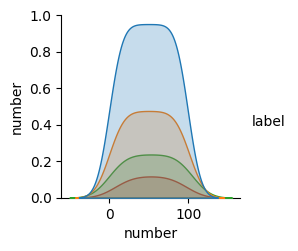

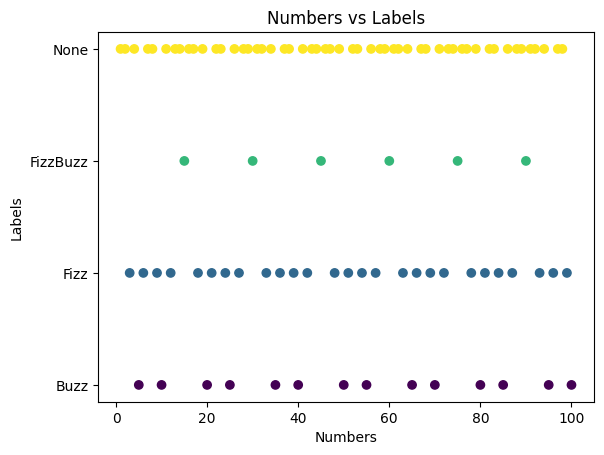

In [4]:
# Plot data features by label
plot_features(df_data)

The given dataset appears to be comprised of four distinct time series, each sampled at different frequencies. Upon examining the patterns displayed by the data points in each class, it becomes evident that classes 'Fizz', 'Buzz', and 'FizzBuzz' are sampled at regular intervals, whereas class 'None' lacks a clear pattern. Based on these observations, it can be inferred that the numbers have been labeled according to their frequency.

In order to improve the accuracy of the classification model, it would be beneficial to calculate a feature that captures information on the frequency of each class. This would help to better distinguish between the different classes and enhance the overall performance of the model.

## Data transformation

In the process of building the classification model, data transformation is necessary to create features that can be utilized by the models. Additionally, some new features may be generated. While each model has specific data requirements, there is a common stage of data transformation that is generally applied. This stage involves the following steps:

- Adding new features by transforming original data.
- Normalizing features to ensure consistency and uniformity in their scales.

In [5]:
features, labels = loader.load_data('original', set_length, return_df=False)

In [6]:
from fizzbuzz_classification.data_preprocessing import transform_series_to_frequency

df_freq = transform_series_to_frequency(df_data)
df_freq['label'] = df_data['label']
display(df_freq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   number_mod3  100 non-null    int64
 1   number_mod5  100 non-null    int64
 2   label        100 non-null    int32
dtypes: int32(1), int64(2)
memory usage: 2.1 KB


None

## Model creation

In this section, the chosen models are fitted to classify the numbers in order to identify models with higher performance. To facilitate this task, we begin by importing necessary packages.

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle

from sklearn.svm import SVC

### Model structures

In model creation, experiment were design and executed with different models structures to find the best fit for the problem. These models are:
- Support Vector Machine

#### SVM

In [37]:
# Initialize an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)

### Model training

In this step, the train, test and validation sets are created.

#### Imbalance classes

In [38]:
# Using weights to approach imbalance class problem
unique_labels, count_labels = np.unique(labels, return_counts=True)
samples_count = labels.shape[0]
weights = np.zeros_like(labels)
weights_labels = np.zeros_like(count_labels, dtype=float)
for i, l in enumerate(unique_labels):
    weights_labels[i] = samples_count / count_labels[i]*2 # Calculate weight for each class
for i, l in enumerate(unique_labels):
    idx = labels == l
    weights[idx] = weights_labels[i]

In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(features, labels, weights, test_size=0.2, random_state=42)

In [40]:
# Set saving directory for models
model_save_dir = os.path.join(os.getcwd(), 'fizzbuzz_classification/models/')
if not os.path.exists(model_save_dir):
    os.mkdir(model_save_dir)

##### Train SVM classifier

In [41]:
# Train, save and load svm classifier
model_name = 'svc'
model_file = model_save_dir + 'model_' + model_name + '.pkl'
if not os.path.exists(model_file):
    print('Training model')
    svm_classifier.fit(X_train, y_train, sample_weight=weights_train)
    print('Saving model')
    svm_classifier
    with open(model_file, 'wb') as fout:
        pickle.dump(svm_classifier, fout)  # Save model
else:
    print('Loading model')
    with open(model_file, 'rb') as fin:
        svm_classifier = pickle.load(fin)  # Load model


Training model
Saving model


#### Test SVM classifier

In [42]:
# Predict labels on the test set
print('Testing model')
y_pred = svm_classifier.predict(X_test)

Testing model


In [43]:
# Calculate accuracy and print classification report
print('Evaluate model')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Evaluate model
Accuracy: 28.00%

Classification Report:
               precision    recall  f1-score   support

        Buzz       0.00      0.00      0.00        29
        Fizz       0.20      0.36      0.26        53
    FizzBuzz       0.00      0.00      0.00        21
         nan       0.42      0.38      0.40        97

    accuracy                           0.28       200
   macro avg       0.15      0.18      0.16       200
weighted avg       0.26      0.28      0.26       200



c:\Users\Adri\PythonEnv\datasci_classification\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adri\PythonEnv\datasci_classification\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adri\PythonEnv\datasci_classification\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

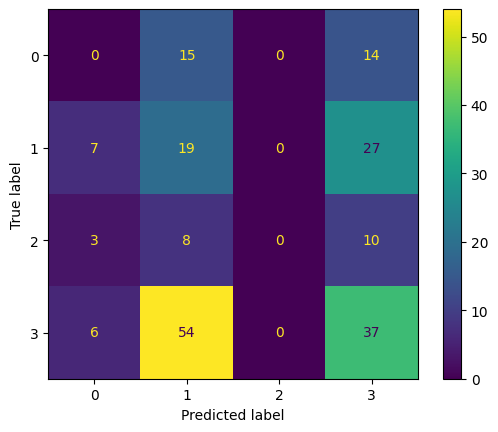

In [44]:
# Add confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
cmD = ConfusionMatrixDisplay(conf_mat)
cmD.plot()


## Models evaluation

In this step the models robustness is evaluated using the cross validation procedure.

In [45]:
from sklearn.model_selection import cross_validate

k = 10
cross_validate(svm_classifier, features, labels, cv=k, fit_params={'sample_weight': weights}, return_estimator=True)

{'fit_time': array([0.04065943, 0.03919363, 0.06610131, 0.04252267, 0.04201555,
        0.03451562, 0.03289008, 0.03350258, 0.03329635, 0.03323817]),
 'score_time': array([0.01609969, 0.008044  , 0.00800014, 0.00801516, 0.00812936,
        0.01609421, 0.00820112, 0.00808692, 0.00857186, 0.0080018 ]),
 'test_score': array([0.06, 0.06, 0.05, 0.03, 0.06, 0.07, 0.07, 0.08, 0.13, 0.13])}